# Libraries Install

In [84]:
# Core Data Libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap, Normalize
from matplotlib.cm import ScalarMappable

# ML & Preprocessing
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Other Utilities
import re
import warnings
from IPython.display import display


In [85]:

fills_rainbow = pd.read_csv('JumpTradingInterview-Fills.RAINBOW.csv')
fills_unicorn = pd.read_csv('JumpTradingInterview-Fills.UNICORN.csv')

marketdata_rainbow = open('JumpTradingInterview-MarketData-ASCII.RAINBOW.txt').readlines()
marketdata_unicorn = open('JumpTradingInterview-MarketData-ASCII.UNICORN.txt').readlines()

fills_rainbow.head(100000)

,Firm,Trader,Symbol,OrderId,IsAggressor,IsBuy,Price,Quantity,ExchangePublishTimestamp,ExchangeReceiptTimestamp
0,YDG,VHA,RAINBOWZ0,223940798,False,False,522250,10,504584250746,504569578887
1,KNR,LFH,RAINBOWZ0,223940570,False,False,522250,7,504584250746,504569578887
2,UJV,KOX,RAINBOWZ0,223940868,False,False,522250,4,504584250746,504569578887
3,KNR,HFW,RAINBOWZ0,223940633,False,False,522250,2,504584250746,504569578887
4,UJV,KOX,RAINBOWZ0,223940786,False,False,522250,4,504584250746,504569578887
...,...,...,...,...,...,...,...,...,...,...
99995,ABW,EBJ,RAINBOWZ0,224566851,True,True,521375,1,40411205611971,40411205316232
99996,UJV,BJA,RAINBOWZ0,224566595,False,False,521375,1,40411205611971,40411205316232
99997,SAU,VRP,RAINBOWZ0,224566852,True,True,521375,2,40411205652867,40411205327124
99998,UJV,BJA,RAINBOWZ0,224566595,False,False,521375,2,40411205652867,40411205327124


In [86]:
fills_rainbow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 848043 entries, 0 to 848042
Data columns (total 10 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   Firm                      848043 non-null  object
 1   Trader                    848043 non-null  object
 2   Symbol                    848043 non-null  object
 3   OrderId                   848043 non-null  int64 
 4   IsAggressor               848043 non-null  bool  
 5   IsBuy                     848043 non-null  bool  
 6   Price                     848043 non-null  int64 
 7   Quantity                  848043 non-null  int64 
 8   ExchangePublishTimestamp  848043 non-null  int64 
 9   ExchangeReceiptTimestamp  848043 non-null  int64 
dtypes: bool(2), int64(5), object(3)
memory usage: 53.4+ MB


In [87]:
print("Number of rows in fills_rainbow:", len(fills_rainbow))
print("Number of rows in marketdata_rainbow:", len(marketdata_rainbow))

Number of rows in fills_rainbow: 848043
Number of rows in marketdata_rainbow: 6629432


In [88]:
print("Columns in Fills CSV:", fills_rainbow.columns.tolist())


Columns in Fills CSV: ['Firm', 'Trader', 'Symbol', 'OrderId', 'IsAggressor', 'IsBuy', 'Price', 'Quantity', 'ExchangePublishTimestamp', 'ExchangeReceiptTimestamp']


### Full File Integrity & Content Check

In [89]:
# 1. Check CSV Files
def check_csv(df, name):
    print(f"\nChecking CSV: {name}")
    print("Shape:", df.shape)
    print("Columns:", df.columns.tolist())
    print("Missing values:\n", df.isnull().sum())
    print("Sample rows:")
    display(df.head())

check_csv(fills_rainbow, "fills_rainbow")
check_csv(fills_unicorn, "fills_unicorn")


Checking CSV: fills_rainbow
Shape: (848043, 10)
Columns: ['Firm', 'Trader', 'Symbol', 'OrderId', 'IsAggressor', 'IsBuy', 'Price', 'Quantity', 'ExchangePublishTimestamp', 'ExchangeReceiptTimestamp']
Missing values:
 Firm                        0
Trader                      0
Symbol                      0
OrderId                     0
IsAggressor                 0
IsBuy                       0
Price                       0
Quantity                    0
ExchangePublishTimestamp    0
ExchangeReceiptTimestamp    0
dtype: int64
Sample rows:


,Firm,Trader,Symbol,OrderId,IsAggressor,IsBuy,Price,Quantity,ExchangePublishTimestamp,ExchangeReceiptTimestamp
0,YDG,VHA,RAINBOWZ0,223940798,False,False,522250,10,504584250746,504569578887
1,KNR,LFH,RAINBOWZ0,223940570,False,False,522250,7,504584250746,504569578887
2,UJV,KOX,RAINBOWZ0,223940868,False,False,522250,4,504584250746,504569578887
3,KNR,HFW,RAINBOWZ0,223940633,False,False,522250,2,504584250746,504569578887
4,UJV,KOX,RAINBOWZ0,223940786,False,False,522250,4,504584250746,504569578887



Checking CSV: fills_unicorn
Shape: (581329, 10)
Columns: ['Firm', 'Trader', 'Symbol', 'OrderId', 'IsAggressor', 'IsBuy', 'Price', 'Quantity', 'ExchangePublishTimestamp', 'ExchangeReceiptTimestamp']
Missing values:
 Firm                        0
Trader                      0
Symbol                      0
OrderId                     0
IsAggressor                 0
IsBuy                       0
Price                       0
Quantity                    0
ExchangePublishTimestamp    0
ExchangeReceiptTimestamp    0
dtype: int64
Sample rows:


,Firm,Trader,Symbol,OrderId,IsAggressor,IsBuy,Price,Quantity,ExchangePublishTimestamp,ExchangeReceiptTimestamp
0,IOU,NBM,UNICORNZ0,1068303150,False,False,1402350,3,504593352016,504569578887
1,YDG,TIE,UNICORNZ0,1068300938,False,False,1402350,1,504593352016,504569578887
2,EIN,YHL,UNICORNZ0,1068301993,False,False,1402350,3,504593352016,504569578887
3,EIN,YHL,UNICORNZ0,1068301828,False,False,1402350,4,504593352016,504569578887
4,NJG,MVL,UNICORNZ0,1068303487,False,False,1402350,3,504593352016,504569578887


In [90]:
# 2. Check TXT (Market Data) Files
def check_txt(txt_data, name):
    print(f"\nChecking TXT File: {name}")
    print("Total lines:", len(txt_data))
    print("First 5 lines:")
    for line in txt_data[:5]:
        print(line.strip())
    print("...")

check_txt(marketdata_rainbow, "marketdata_rainbow")
check_txt(marketdata_unicorn, "marketdata_unicorn")


Checking TXT File: marketdata_rainbow
Total lines: 6629432
First 5 lines:
--------- Begin Packet 1 Size=1455 -----------
ADD type=1, ts=342231, txTs=0, orderId=223940643, price=522675, qty=1, trader=27, symbol=1, isBuy=0, Book: [Bid: 5 @ px 522200 (1 orders) | Ask: qty7 @ px 520950 (1 orders)]
CXL type=2, ts=3404675449, txTs=3404400990, orderId=223940631, Book: [Bid: 5 @ px 522200 (1 orders) | Ask: qty7 @ px 520950 (1 orders)]
ADD type=1, ts=3517124071, txTs=3516962016, orderId=223940644, price=521100, qty=1, trader=12, symbol=1, isBuy=1, Book: [Bid: 5 @ px 522200 (1 orders) | Ask: qty7 @ px 520950 (1 orders)]
CXL type=2, ts=4191194639, txTs=4190904492, orderId=223871585, Book: [Bid: 5 @ px 522200 (1 orders) | Ask: qty7 @ px 520950 (1 orders)]
...

Checking TXT File: marketdata_unicorn
Total lines: 5154214
First 5 lines:
--------- Begin Packet 1 Size=1453 -----------
ADD type=1, ts=68103522647, txTs=68103340030, orderId=1068301008, price=1401650, qty=1, trader=25, symbol=2, isBuy=0, B

# 01 :Latency Profile Analysis

Latency Summary (ms):
count    848043.000000
mean         -0.456336
std           0.564982
min         -53.614319
25%          -0.469374
50%          -0.335952
75%          -0.259518
max          -0.156159
Name: latency_ms, dtype: float64


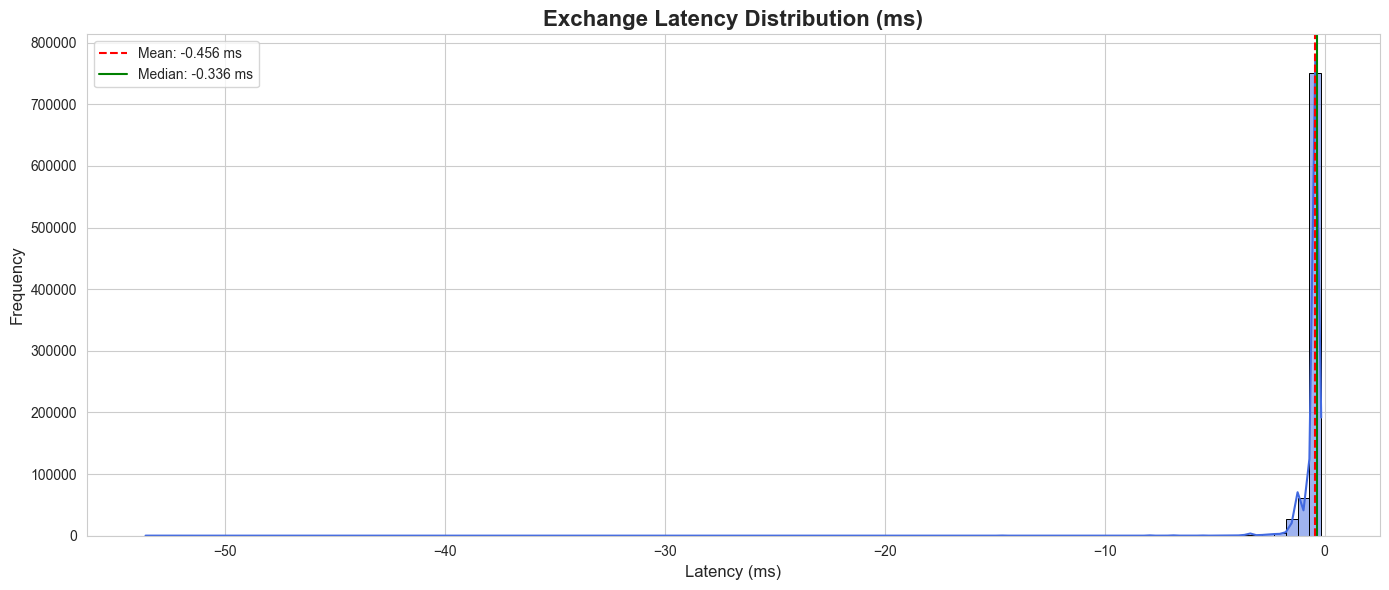

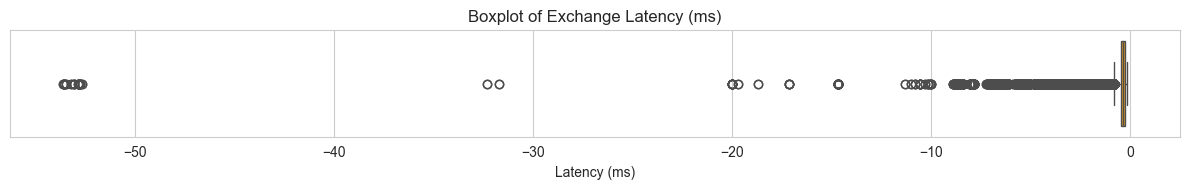

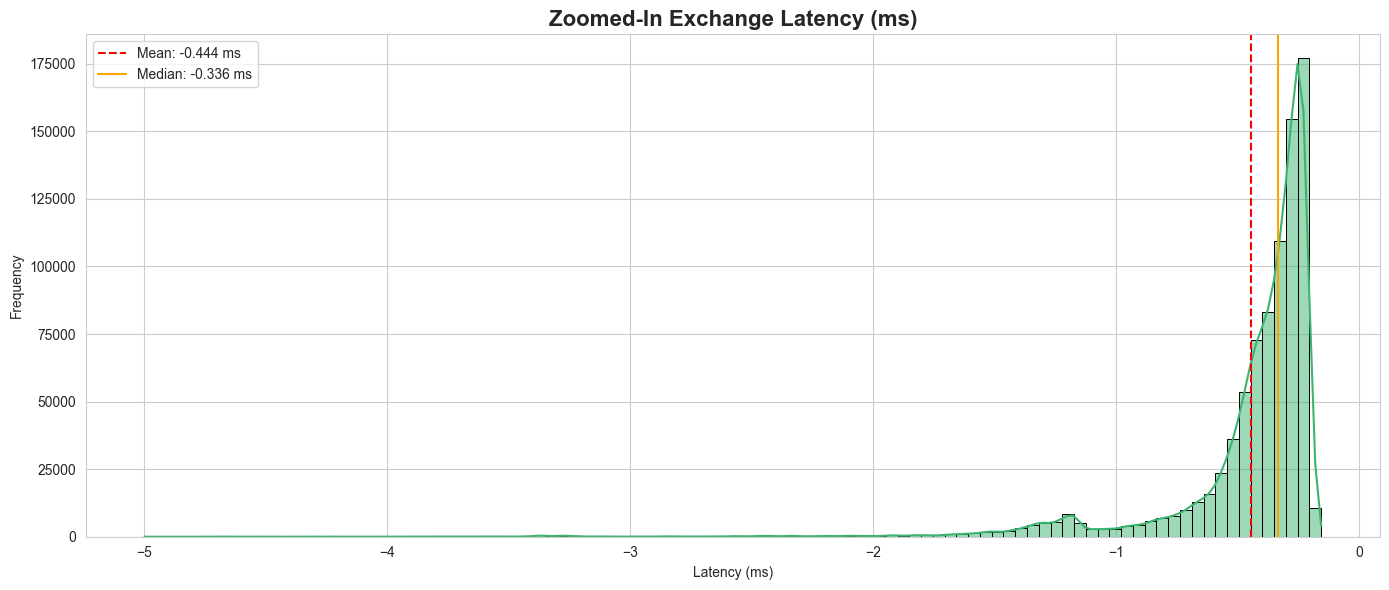

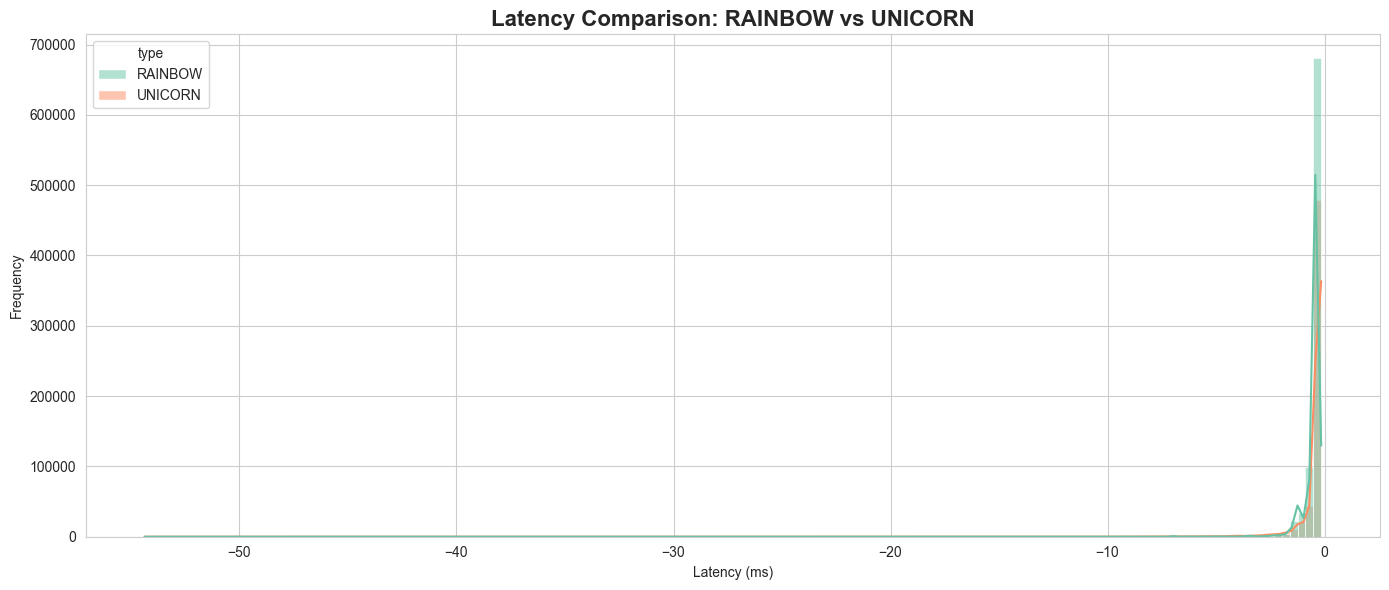

In [92]:


warnings.filterwarnings("ignore")

# Load CSV (Make sure these files are in the same directory)
fills_rainbow = pd.read_csv('JumpTradingInterview-Fills.RAINBOW.csv')

# Create Latency Column (in nanoseconds)
fills_rainbow['latency'] = fills_rainbow['ExchangeReceiptTimestamp'] - fills_rainbow['ExchangePublishTimestamp']

# Convert to milliseconds
fills_rainbow['latency_ms'] = fills_rainbow['latency'] / 1e6

# Summary Statistics
print("Latency Summary (ms):")
print(fills_rainbow['latency_ms'].describe())

# Histogram - Full View
plt.figure(figsize=(14, 6))
sns.set_style("whitegrid")
sns.histplot(fills_rainbow['latency_ms'], bins=100, kde=True, color="royalblue", edgecolor="black")
plt.axvline(fills_rainbow['latency_ms'].mean(), color='red', linestyle='--', label=f"Mean: {fills_rainbow['latency_ms'].mean():.3f} ms")
plt.axvline(fills_rainbow['latency_ms'].median(), color='green', linestyle='-', label=f"Median: {fills_rainbow['latency_ms'].median():.3f} ms")
plt.title("Exchange Latency Distribution (ms)", fontsize=16, weight='bold')
plt.xlabel("Latency (ms)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

# Boxplot
plt.figure(figsize=(12, 2))
sns.boxplot(x=fills_rainbow['latency_ms'], color='orange')
plt.title("Boxplot of Exchange Latency (ms)")
plt.xlabel("Latency (ms)")
plt.tight_layout()
plt.show()

# Zoomed-In Histogram (filtering extreme outliers)
filtered = fills_rainbow[fills_rainbow['latency_ms'] > -5]

plt.figure(figsize=(14, 6))
sns.histplot(filtered['latency_ms'], bins=100, kde=True, color="mediumseagreen", edgecolor="black")
plt.axvline(filtered['latency_ms'].mean(), color='red', linestyle='--', label=f"Mean: {filtered['latency_ms'].mean():.3f} ms")
plt.axvline(filtered['latency_ms'].median(), color='orange', linestyle='-', label=f"Median: {filtered['latency_ms'].median():.3f} ms")
plt.title("Zoomed-In Exchange Latency (ms)", fontsize=16, weight='bold')
plt.xlabel("Latency (ms)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

fills_unicorn = pd.read_csv('JumpTradingInterview-Fills.UNICORN.csv')
fills_unicorn['latency'] = fills_unicorn['ExchangeReceiptTimestamp'] - fills_unicorn['ExchangePublishTimestamp']
fills_unicorn['latency_ms'] = fills_unicorn['latency'] / 1e6

# Combine for comparison
fills_rainbow['type'] = 'RAINBOW'
fills_unicorn['type'] = 'UNICORN'
combined = pd.concat([fills_rainbow, fills_unicorn])

plt.figure(figsize=(14, 6))
sns.histplot(data=combined, x='latency_ms', hue='type', bins=150, kde=True, palette='Set2')
plt.title("Latency Comparison: RAINBOW vs UNICORN", fontsize=16, weight='bold')
plt.xlabel("Latency (ms)")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()



# 2. Order Flow & Trade Dynamics

### (a) Buy vs Sell Breakdown

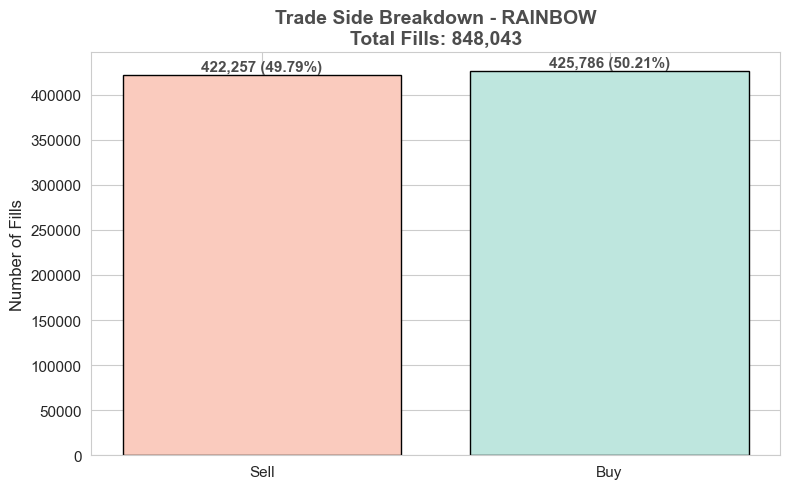

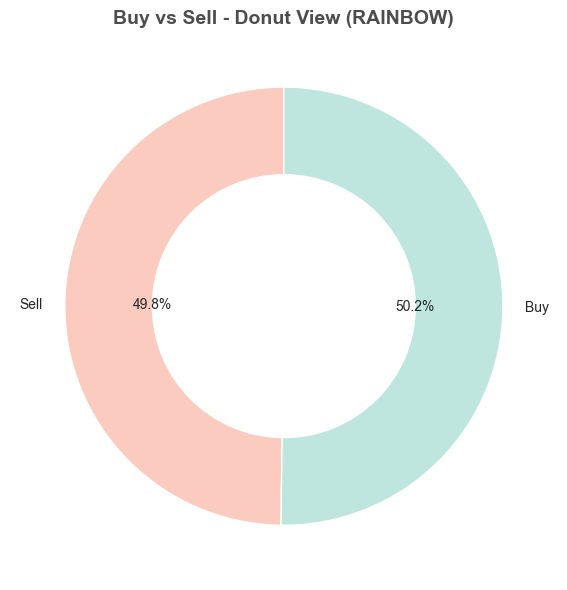

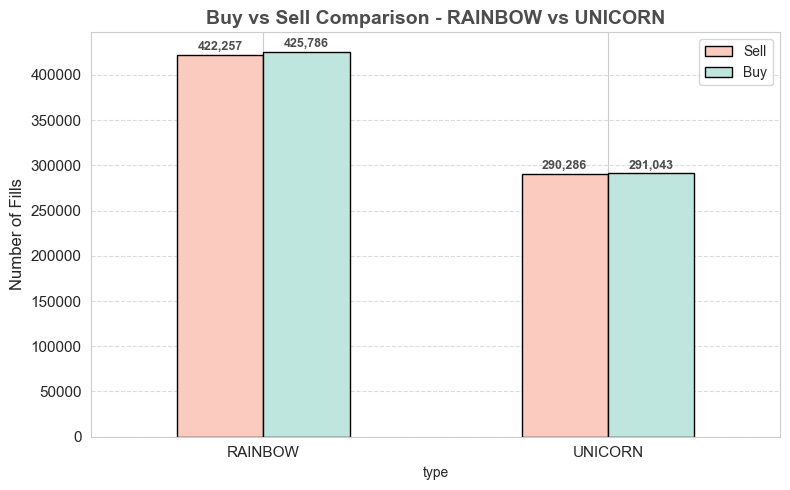

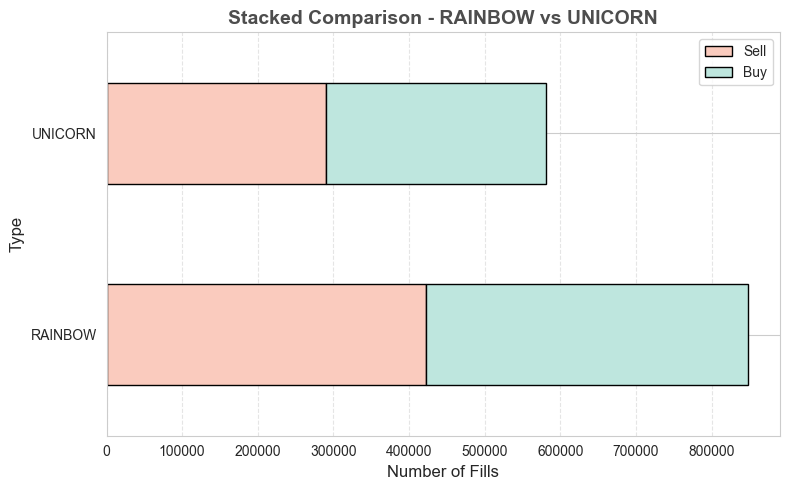

,RAINBOW,UNICORN,RAINBOW %,UNICORN %
IsBuy,,,,
Buy,425786,291043,50.21,50.07
Sell,422257,290286,49.79,49.93


In [93]:


# Load the datasets
fills_rainbow = pd.read_csv('JumpTradingInterview-Fills.RAINBOW.csv')
fills_unicorn = pd.read_csv('JumpTradingInterview-Fills.UNICORN.csv')

# Add type column
fills_rainbow['type'] = 'RAINBOW'
fills_unicorn['type'] = 'UNICORN'

# Merge both datasets
combined = pd.concat([fills_rainbow, fills_unicorn], ignore_index=True)

# Professional color palette
professional_colors = ['#FACBBE', '#BEE6DE']  # Sell, Buy
neutral_gray = '#4D4D4D'
sns.set_style("whitegrid")

# View 1: RAINBOW only Buy vs Sell Breakdown
buy_sell_counts = fills_rainbow['IsBuy'].value_counts().sort_index()
buy_sell_counts.index = ["Sell", "Buy"]
total = buy_sell_counts.sum()
percentages = (buy_sell_counts / total * 100).round(2)

plt.figure(figsize=(8, 5))
bars = plt.bar(buy_sell_counts.index, buy_sell_counts.values, color=professional_colors, edgecolor='black')
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1000,
             f"{buy_sell_counts[i]:,} ({percentages[i]}%)", ha='center', va='bottom',
             fontsize=11, fontweight='bold', color=neutral_gray)
plt.title(f"Trade Side Breakdown - RAINBOW\nTotal Fills: {total:,}", fontsize=14, weight='bold', color=neutral_gray)
plt.ylabel("Number of Fills", fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()

# View 2: Donut Pie Chart
plt.figure(figsize=(6, 6))
plt.pie(buy_sell_counts, labels=["Sell", "Buy"], autopct='%1.1f%%', startangle=90, colors=professional_colors,
        wedgeprops=dict(width=0.4, edgecolor='white'))
plt.title("Buy vs Sell - Donut View (RAINBOW)", fontsize=14, weight='bold', color=neutral_gray)
plt.tight_layout()
plt.show()

# View 3: Grouped Bar - RAINBOW vs UNICORN
grouped = combined.groupby(['type', 'IsBuy']).size().unstack()
grouped.columns = ['Sell', 'Buy']
grouped = grouped[["Sell", "Buy"]]

ax = grouped.plot(kind='bar', figsize=(8, 5), color=professional_colors, edgecolor='black')
plt.title("Buy vs Sell Comparison - RAINBOW vs UNICORN", fontsize=14, weight='bold', color=neutral_gray)
plt.ylabel("Number of Fills", fontsize=12)
plt.xticks(rotation=0, fontsize=11)
plt.yticks(fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.7)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height()):,}',
                (p.get_x() + p.get_width() / 2, p.get_height() + 2000),
                ha='center', va='bottom', fontsize=9, fontweight='bold', color=neutral_gray)
plt.tight_layout()
plt.show()

# View 4: Stacked View
grouped.plot(kind='barh', stacked=True, figsize=(8, 5), color=professional_colors, edgecolor='black')
plt.title("Stacked Comparison - RAINBOW vs UNICORN", fontsize=14, weight='bold', color=neutral_gray)
plt.xlabel("Number of Fills", fontsize=12)
plt.ylabel("Type", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



# View 5: KPI Table

rainbow_kpi = fills_rainbow['IsBuy'].value_counts().rename(index={0: 'Sell', 1: 'Buy'})
unicorn_kpi = fills_unicorn['IsBuy'].value_counts().rename(index={0: 'Sell', 1: 'Buy'})
kpi_table = pd.DataFrame({'RAINBOW': rainbow_kpi, 'UNICORN': unicorn_kpi})
kpi_table['RAINBOW %'] = (kpi_table['RAINBOW'] / kpi_table['RAINBOW'].sum() * 100).round(2)
kpi_table['UNICORN %'] = (kpi_table['UNICORN'] / kpi_table['UNICORN'].sum() * 100).round(2)
display(kpi_table)



### (b) Aggressor vs Passive Orders

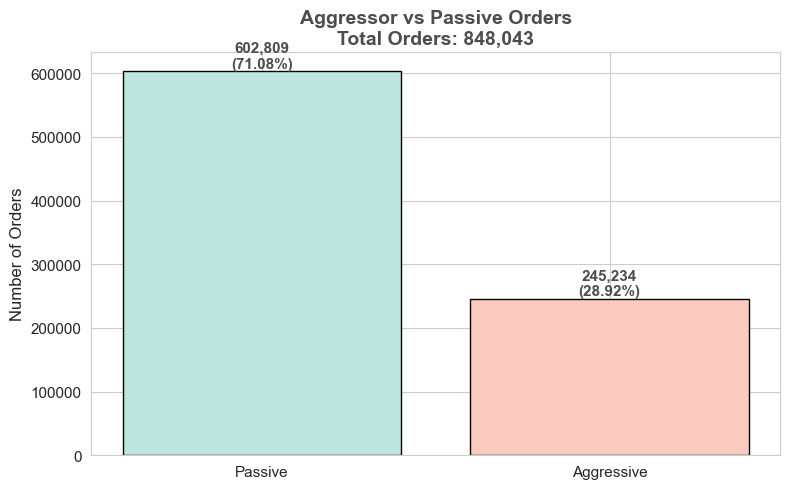

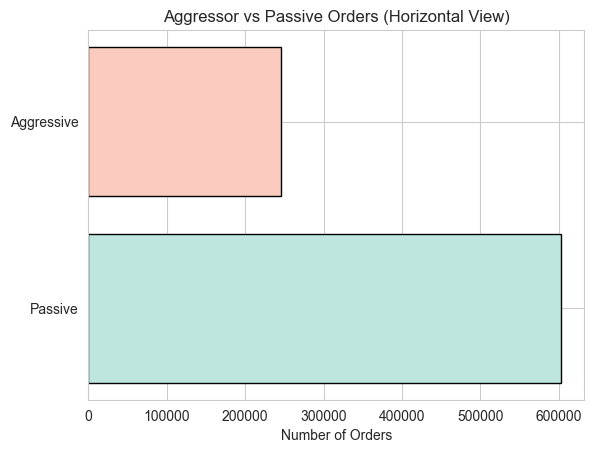

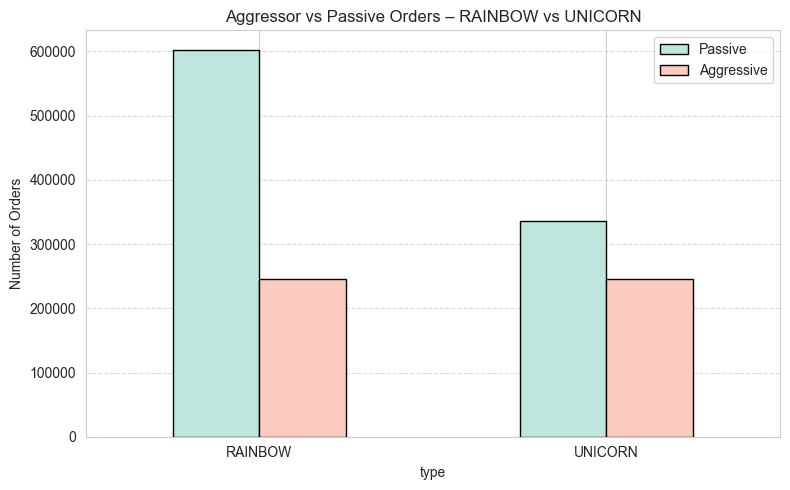

In [66]:


# Count Aggressor vs Passive
aggressor_counts = fills_rainbow['IsAggressor'].value_counts().sort_index()
aggressor_counts.index = ['Passive', 'Aggressive']
total_orders = aggressor_counts.sum()
percentages = (aggressor_counts / total_orders * 100).round(2)

# Color palette
colors = ['#BEE6DE', '#FACBBE']  # Passive: mint green, Aggressive: soft peach
neutral_gray = '#4D4D4D'

# Bar Plot
sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))
bars = plt.bar(aggressor_counts.index, aggressor_counts.values,
               color=colors, edgecolor='black')

# Annotate counts and percentages
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1000,
             f"{aggressor_counts[i]:,}\n({percentages[i]}%)",
             ha='center', va='bottom', fontsize=11, fontweight='bold', color=neutral_gray)

# Titles and labels
plt.title(f"Aggressor vs Passive Orders\nTotal Orders: {total_orders:,}",
          fontsize=14, weight='bold', color=neutral_gray)
plt.ylabel("Number of Orders", fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()


plt.barh(aggressor_counts.index, aggressor_counts.values,
         color=colors, edgecolor='black')
plt.xlabel("Number of Orders")
plt.title("Aggressor vs Passive Orders (Horizontal View)")

grouped = combined.groupby(['type', 'IsAggressor']).size().unstack()
grouped.columns = ['Passive', 'Aggressive']
grouped.plot(kind='bar', figsize=(8, 5), color=colors, edgecolor='black')
plt.title("Aggressor vs Passive Orders – RAINBOW vs UNICORN")
plt.ylabel("Number of Orders")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()




### (c) Price Levels with Most Activity

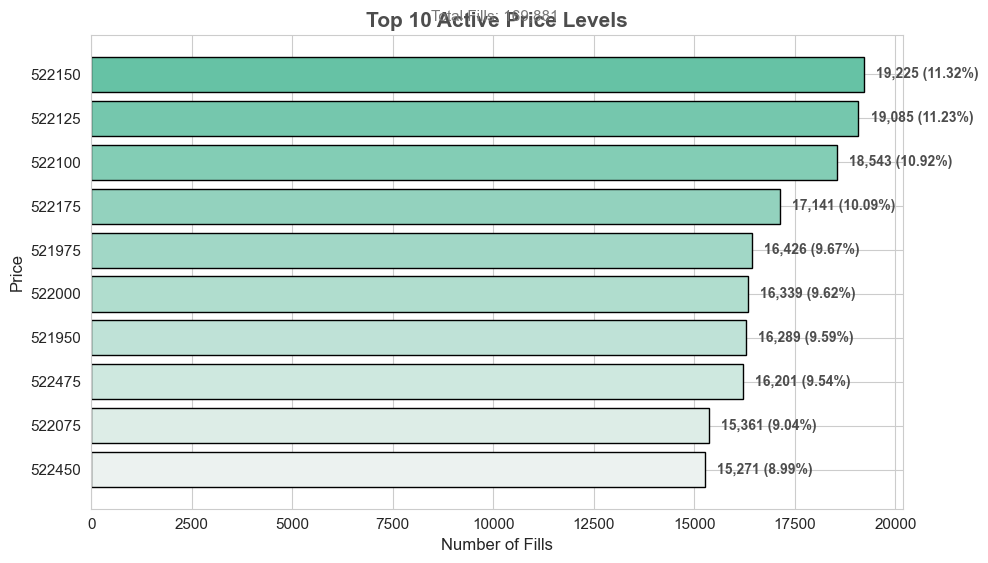

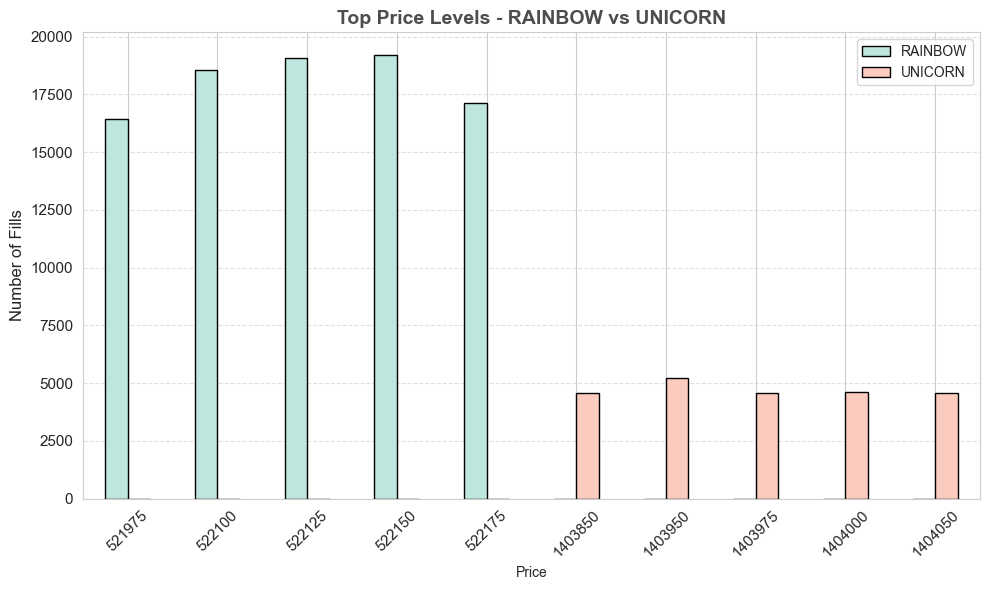

In [94]:


# Reload data from mounted file path
fills_rainbow = pd.read_csv('JumpTradingInterview-Fills.RAINBOW.csv')
fills_unicorn = pd.read_csv('JumpTradingInterview-Fills.UNICORN.csv')

# Count top 10 active price levels
top_prices = fills_rainbow['Price'].value_counts().head(10).sort_values(ascending=True)
total_fills = top_prices.sum()
percentages = (top_prices / total_fills * 100).round(2)

# Pastel color gradient
colors = sns.color_palette("light:#66c2a5", n_colors=len(top_prices))  # Light mint tone gradient

# Horizontal bar chart
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
bars = plt.barh(top_prices.index.astype(str), top_prices.values, color=colors, edgecolor='black')

# Annotate bars
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width + 300, bar.get_y() + bar.get_height()/2,
             f"{top_prices.values[i]:,} ({percentages.values[i]}%)",
             va='center', fontsize=10, fontweight='bold', color='#4D4D4D')

plt.title("Top 10 Active Price Levels", fontsize=15, weight='bold', color='#4D4D4D')
plt.suptitle(f"Total Fills: {total_fills:,}", fontsize=11, color='#777777', y=0.93)
plt.xlabel("Number of Fills", fontsize=12)
plt.ylabel("Price", fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()

# Side-by-side top prices comparison
top_r = fills_rainbow['Price'].value_counts().head(5)
top_u = fills_unicorn['Price'].value_counts().head(5)
df_compare = pd.DataFrame({'RAINBOW': top_r, 'UNICORN': top_u}).fillna(0)

df_compare.plot(kind='bar', figsize=(10, 6), color=['#BEE6DE', '#FACBBE'], edgecolor='black')
plt.title("Top Price Levels - RAINBOW vs UNICORN", fontsize=14, weight='bold', color='#4D4D4D')
plt.ylabel("Number of Fills", fontsize=12)
plt.xticks(rotation=45, fontsize=11)
plt.yticks(fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


# 3. Spread Compression & Market Events

### List item Add blockquote

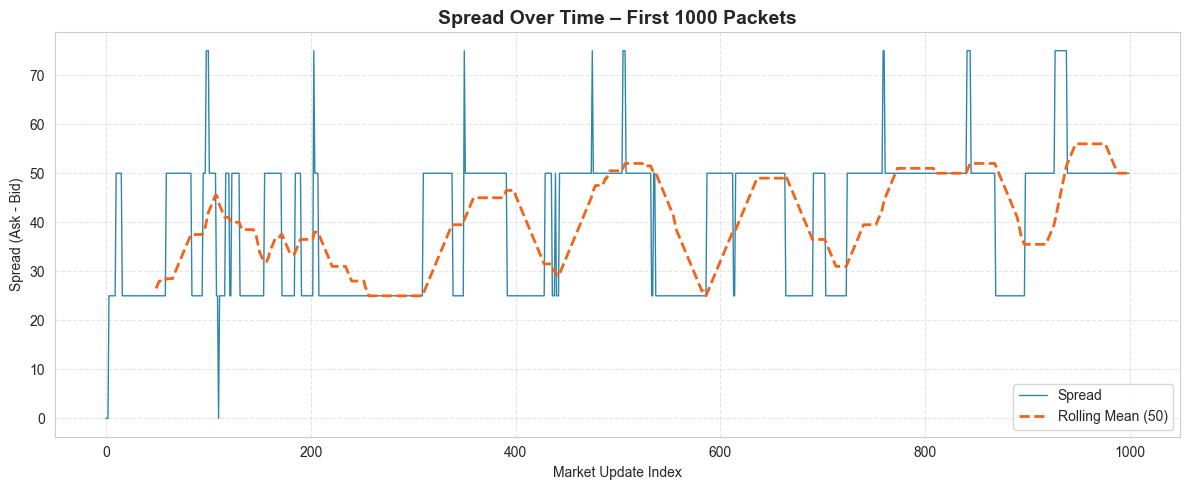

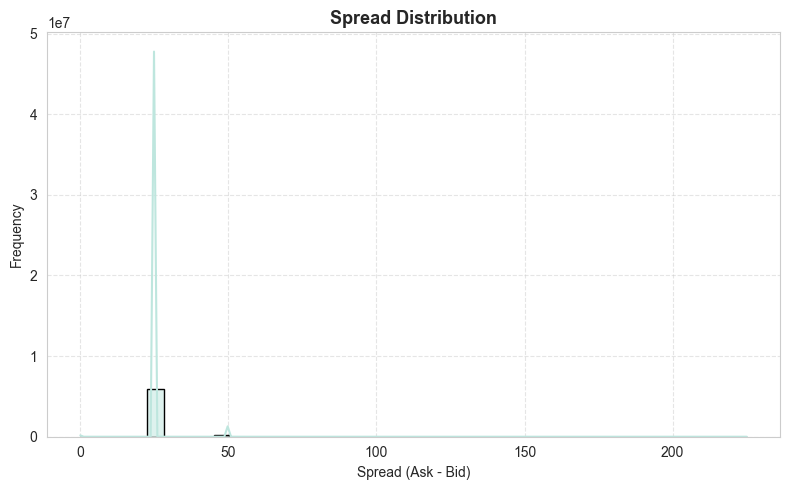

,Min,Max,Mean,Median,Std Dev,25%,75%
Spread Stats,0,225,25.96,25.0,5.62,25.0,25.0


📈 Detected 263104 outliers (|Z| > 3)
Outlier values: [ 0  0  0 50 50] ...


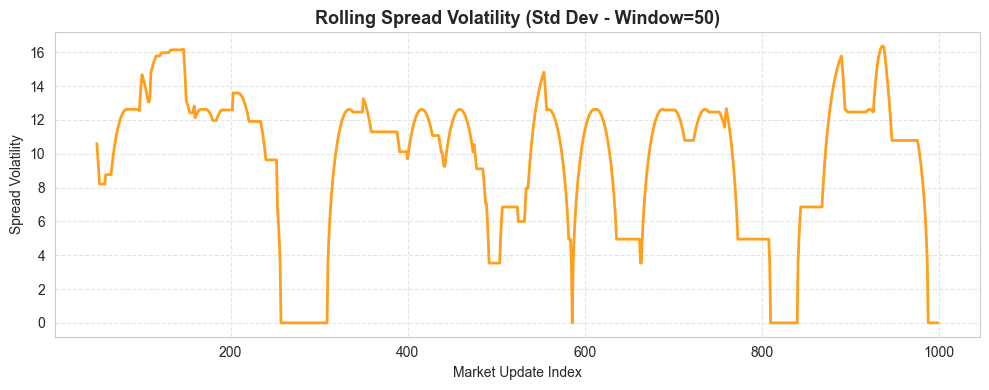

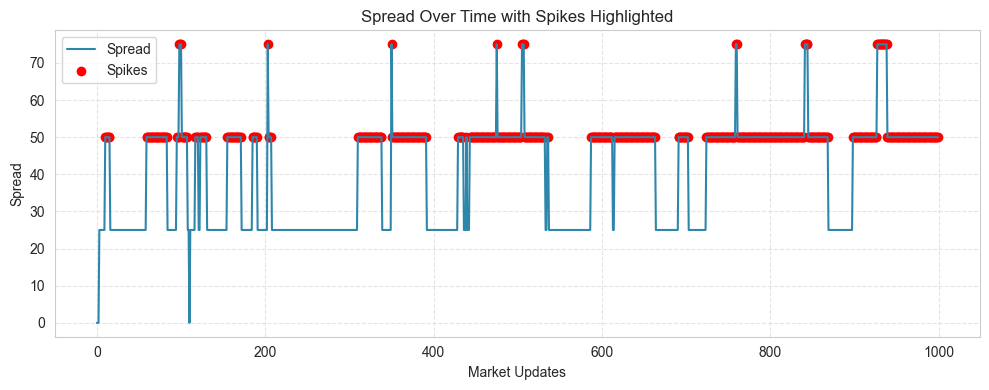

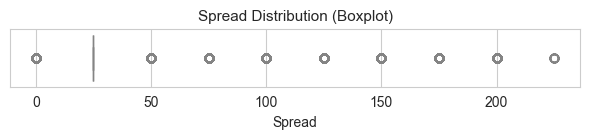

In [95]:


# Step 1: Extract Bid & Ask Prices using regex
bid_prices = []
ask_prices = []

for line in marketdata_rainbow:
    bid_match = re.search(r'Bid: \d+ @ px (\d+)', line)
    ask_match = re.search(r'Ask: qty\d+ @ px (\d+)', line)

    if bid_match and ask_match:
        bid_prices.append(int(bid_match.group(1)))
        ask_prices.append(int(ask_match.group(1)))

# Step 2: Calculate Spread
spread = np.array(ask_prices) - np.array(bid_prices)
spread_filtered = spread[spread >= 0]

# Step 3: Rolling Statistics
rolling_mean = pd.Series(spread_filtered).rolling(window=50).mean()
rolling_std = pd.Series(spread_filtered).rolling(window=50).std()

# Step 4: Plot Time Series + Rolling Mean
plt.figure(figsize=(12, 5))
plt.plot(spread_filtered[:1000], label='Spread', color='#2E86AB', linewidth=1)
plt.plot(rolling_mean[:1000], label='Rolling Mean (50)', color='#F26419', linestyle='--', linewidth=2)
plt.title("Spread Over Time – First 1000 Packets", fontsize=14, weight='bold')
plt.xlabel("Market Update Index")
plt.ylabel("Spread (Ask - Bid)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

# Step 5: Histogram + KDE
plt.figure(figsize=(8, 5))
sns.histplot(spread_filtered, kde=True, bins=40, color='#BEE6DE', edgecolor='black')
plt.title("Spread Distribution", fontsize=13, weight='bold')
plt.xlabel("Spread (Ask - Bid)")
plt.ylabel("Frequency")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Step 6: Spread Summary Table
summary = {
    'Min': np.min(spread_filtered),
    'Max': np.max(spread_filtered),
    'Mean': round(np.mean(spread_filtered), 2),
    'Median': np.median(spread_filtered),
    'Std Dev': round(np.std(spread_filtered), 2),
    '25%': np.percentile(spread_filtered, 25),
    '75%': np.percentile(spread_filtered, 75)
}
summary_df = pd.DataFrame(summary, index=["Spread Stats"])
display(summary_df)

# Step 7: Outlier Detection (Z-Score > 3)
from scipy.stats import zscore
spread_z = zscore(spread_filtered)
outliers = spread_filtered[np.abs(spread_z) > 3]

print(f"📈 Detected {len(outliers)} outliers (|Z| > 3)")
print("Outlier values:", outliers[:5], "...")

plt.figure(figsize=(10, 4))
plt.plot(rolling_std[:1000], color='#FF9F1C', linewidth=2)
plt.title("Rolling Spread Volatility (Std Dev - Window=50)", fontsize=13, weight='bold')
plt.xlabel("Market Update Index")
plt.ylabel("Spread Volatility")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

threshold = np.percentile(spread_filtered, 95)  # Top 5%
spike_indices = np.where(spread_filtered[:1000] > threshold)[0]

plt.figure(figsize=(10, 4))
plt.plot(spread_filtered[:1000], label='Spread', color='#2E86AB')
plt.scatter(spike_indices, spread_filtered[spike_indices], color='red', label='Spikes')
plt.title("Spread Over Time with Spikes Highlighted")
plt.xlabel("Market Updates")
plt.ylabel("Spread")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 1.5))
sns.boxplot(x=spread_filtered, color='#FACBBE')
plt.title("Spread Distribution (Boxplot)", fontsize=11)
plt.xlabel("Spread")
plt.tight_layout()
plt.show()



# 4. Trader Behavior Insights


### (a) Top Firms by Fill Count

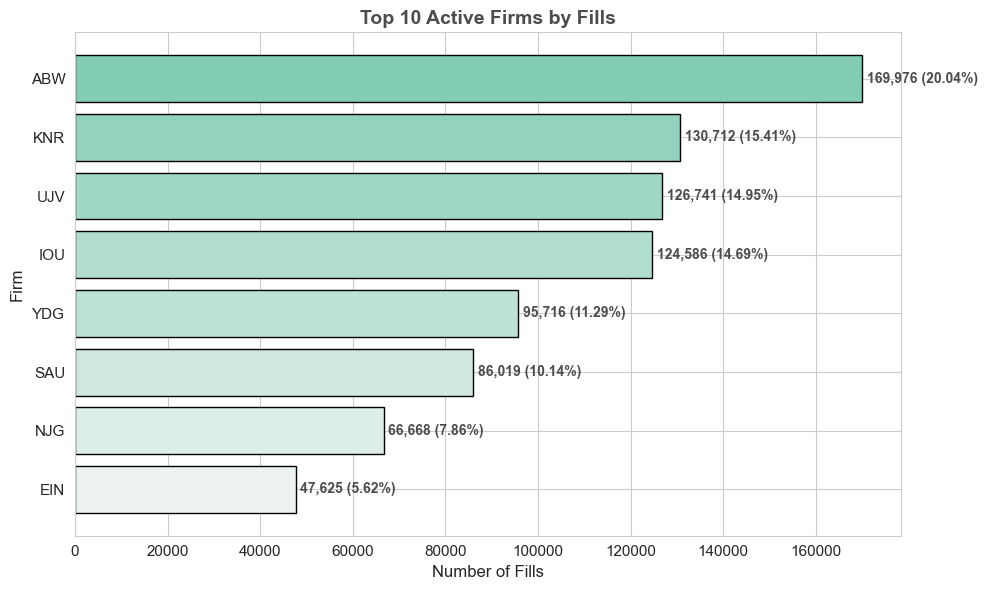

,Firm,Fills,Percentage
0,ABW,169976,20.04
1,KNR,130712,15.41
2,UJV,126741,14.95
3,IOU,124586,14.69
4,YDG,95716,11.29
5,SAU,86019,10.14
6,NJG,66668,7.86
7,EIN,47625,5.62


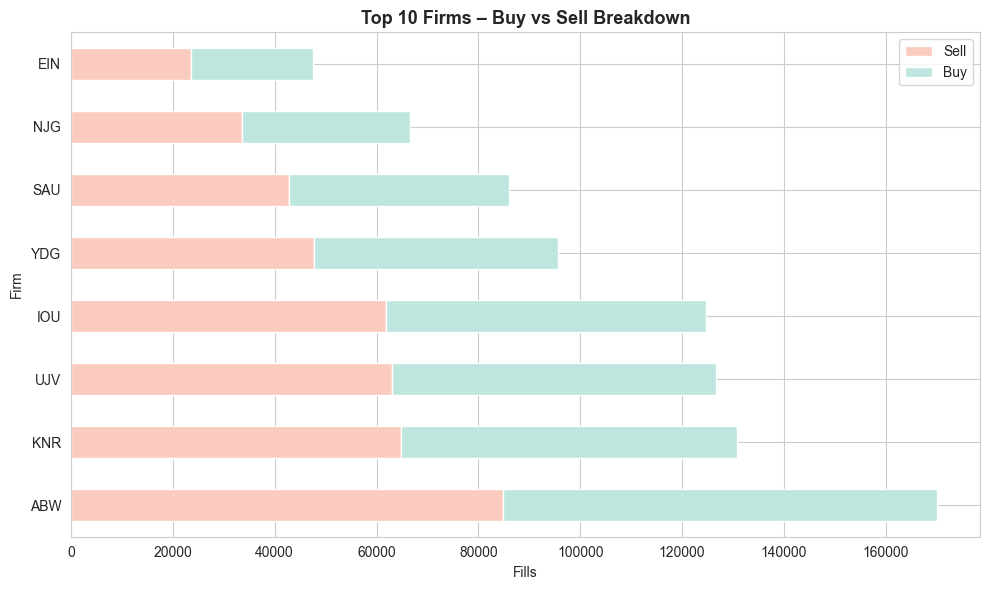

Text(0.5, 1.0, 'Firm Fill Activity Over Time')

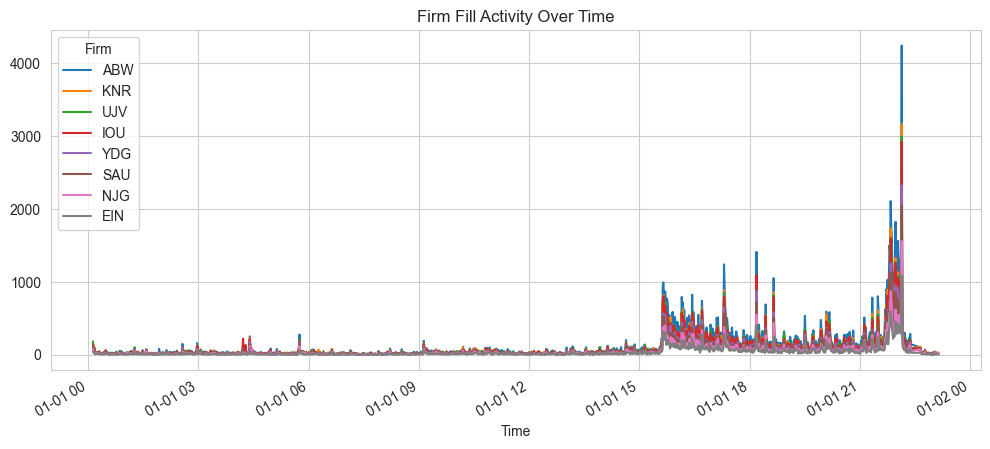

In [37]:


# Prepare data
top_firms = fills_rainbow['Firm'].value_counts().head(10)
total_fills = top_firms.sum()
percentages = (top_firms / total_fills * 100).round(2)

# Color palette & theme
colors = sns.color_palette("light:#66c2a5", n_colors=10)  # Pastel green gradient
neutral_gray = '#4D4D4D'
sns.set_style("whitegrid")

# Plot
plt.figure(figsize=(10, 6))
bars = plt.barh(top_firms.index[::-1], top_firms.values[::-1], color=colors, edgecolor='black')

# Annotate each bar
for i, bar in enumerate(bars):
    width = bar.get_width()
    firm = top_firms.index[::-1][i]
    count = top_firms[firm]
    pct = percentages[firm]
    plt.text(width + 1000, bar.get_y() + bar.get_height()/2,
             f"{count:,} ({pct}%)",
             va='center', fontsize=10, fontweight='bold', color=neutral_gray)

# Titles & axes
plt.title("Top 10 Active Firms by Fills", fontsize=14, weight='bold', color=neutral_gray)
plt.xlabel("Number of Fills", fontsize=12)
plt.ylabel("Firm", fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()

top_firm_df = pd.DataFrame({
    'Firm': top_firms.index,
    'Fills': top_firms.values,
    'Percentage': percentages.values
})
display(top_firm_df)

grouped = fills_rainbow.groupby(['Firm', 'IsBuy']).size().unstack().fillna(0).astype(int)
grouped = grouped.loc[top_firms.index]
grouped.columns = ['Sell', 'Buy']

grouped.plot(kind='barh', stacked=True, figsize=(10, 6), color=['#FACBBE', '#BEE6DE'])
plt.title("Top 10 Firms – Buy vs Sell Breakdown", fontsize=13, weight='bold')
plt.xlabel("Fills")
plt.tight_layout()
plt.show()

fills_rainbow['Time'] = pd.to_datetime(fills_rainbow['ExchangePublishTimestamp'], unit='ns')
time_grouped = fills_rainbow.groupby([pd.Grouper(key='Time', freq='1Min'), 'Firm']).size().unstack(fill_value=0)
time_grouped[top_firms.index].plot(figsize=(12, 5))
plt.title("Firm Fill Activity Over Time")


### (b) Aggressiveness by Firm

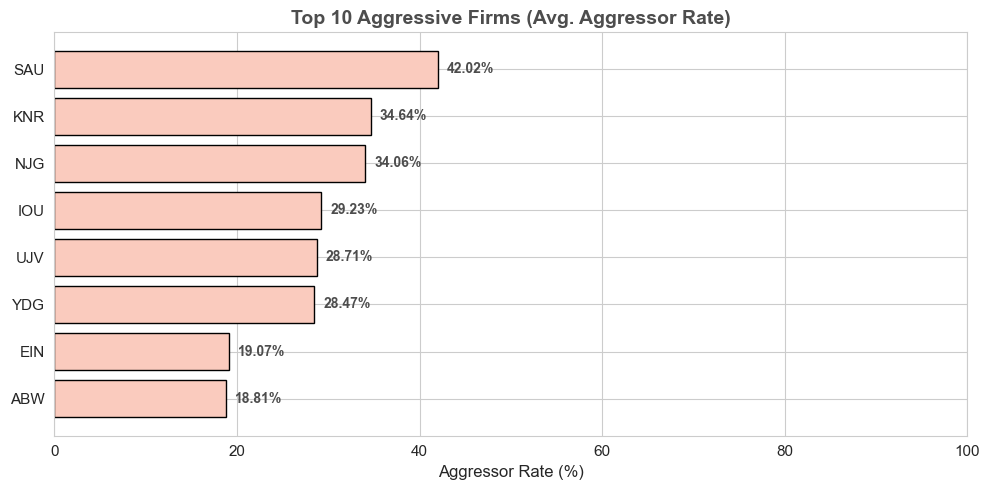

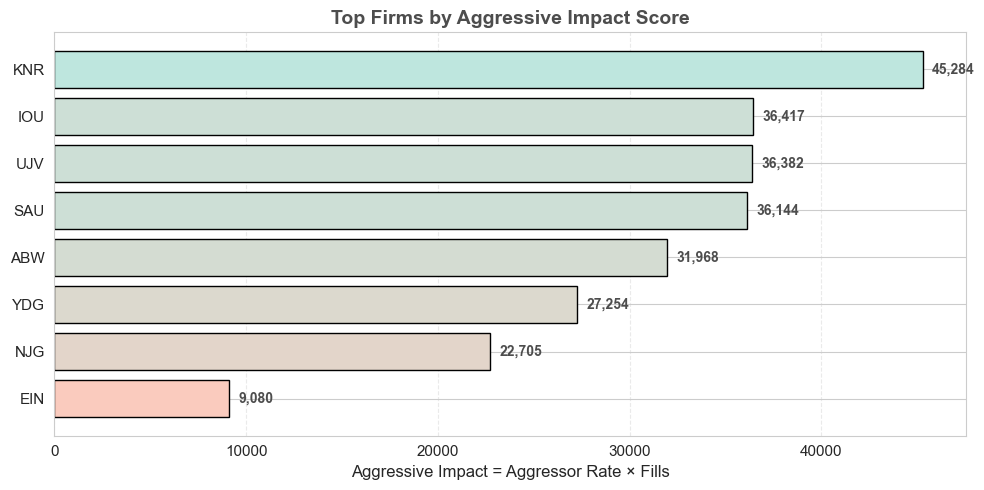

In [54]:

# Color Palette (pastel-based)
aggressive_color = '#FACBBE'   # Soft Peach
passive_color = '#AEE5D8'      # Mint Green
neutral_gray = '#4D4D4D'
highlight_color = '#F4BFBF'    # Accent variation for high impact

# Step 1: Aggressor Rate by Firm
firm_aggressor = fills_rainbow.groupby('Firm')['IsAggressor'].mean()
firm_aggressor = firm_aggressor.sort_values(ascending=False).head(10)
firm_aggressor_pct = (firm_aggressor * 100).round(2)

# Aggressor Rate Chart
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(10, 5))
bars = ax.barh(firm_aggressor_pct.index[::-1], firm_aggressor_pct.values[::-1],
               color=aggressive_color, edgecolor='black')

# Annotate %
for i, bar in enumerate(bars):
    width = bar.get_width()
    firm = firm_aggressor_pct.index[::-1][i]
    ax.text(width + 1, bar.get_y() + bar.get_height()/2,
            f"{firm_aggressor_pct[firm]}%", va='center',
            fontsize=10, fontweight='bold', color=neutral_gray)

# Aesthetics
ax.set_title("Top 10 Aggressive Firms (Avg. Aggressor Rate)", fontsize=14, weight='bold', color=neutral_gray)
ax.set_xlabel("Aggressor Rate (%)", fontsize=12)
ax.set_xlim(0, 100)
ax.tick_params(axis='both', labelsize=11)
plt.tight_layout()
plt.show()


# Step 2: Aggression × Fills = Impact Score
firm_fills = fills_rainbow['Firm'].value_counts()
impact_score = (firm_aggressor * firm_fills).sort_values(ascending=False).head(10)

# Custom Gradient Map using pastel peach -> mint
custom_cmap = LinearSegmentedColormap.from_list("mint_peach", ['#FACBBE', '#BEE6DE'])

# Normalize
norm = Normalize(vmin=impact_score.min(), vmax=impact_score.max())

fig, ax = plt.subplots(figsize=(10, 5))
bars2 = ax.barh(impact_score.index[::-1], impact_score.values[::-1],
                color=[custom_cmap(norm(v)) for v in impact_score.values[::-1]],
                edgecolor='black')

# Annotate exact impact values
for i, bar in enumerate(bars2):
    width = bar.get_width()
    firm = impact_score.index[::-1][i]
    ax.text(width + 500, bar.get_y() + bar.get_height()/2,
            f"{int(width):,}", va='center',
            fontsize=10, fontweight='bold', color=neutral_gray)

# Final touches
ax.set_title("Top Firms by Aggressive Impact Score", fontsize=14, weight='bold', color=neutral_gray)
ax.set_xlabel("Aggressive Impact = Aggressor Rate × Fills", fontsize=12)
ax.tick_params(axis='both', labelsize=11)
ax.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


### (c) Heatmap: Firm vs Price Level

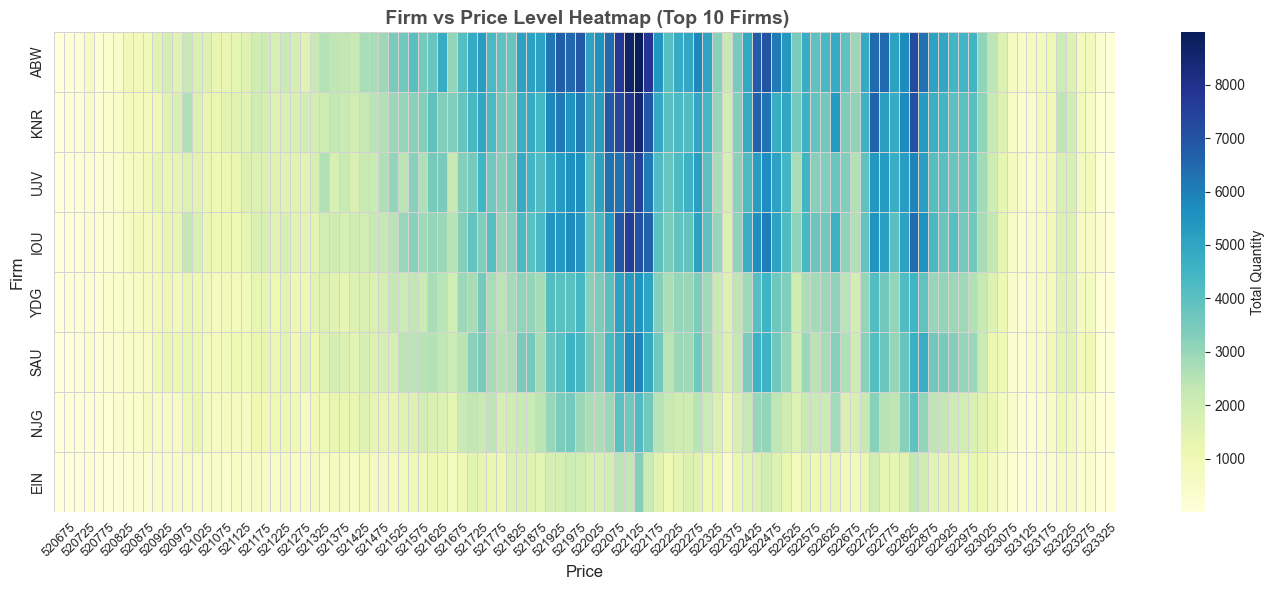

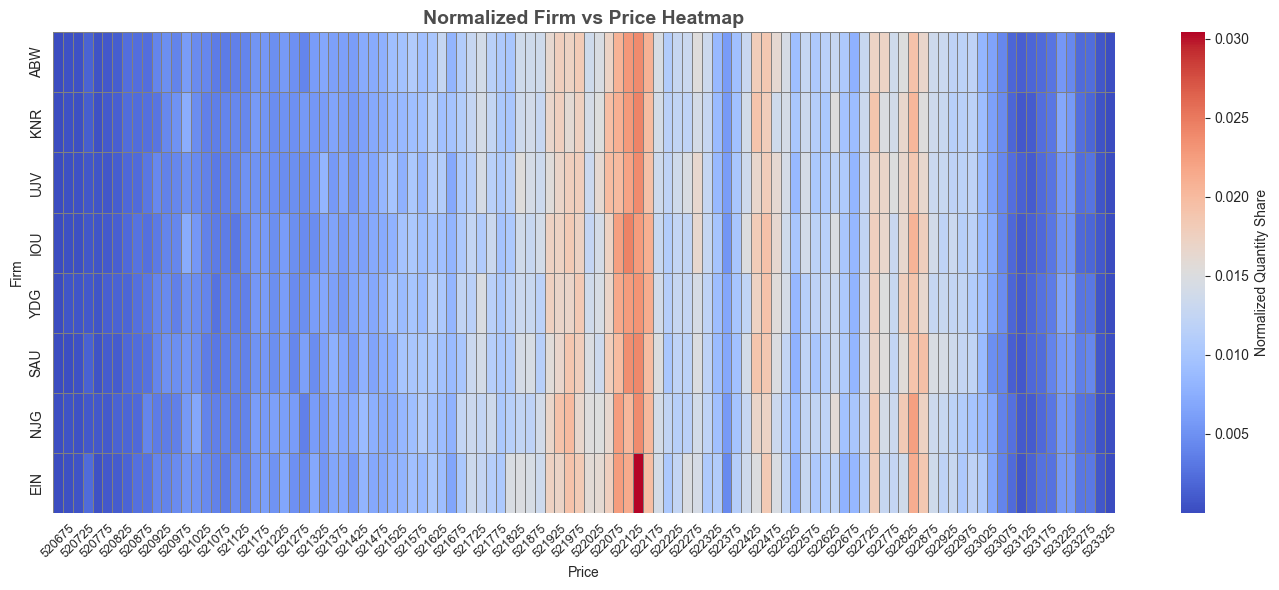

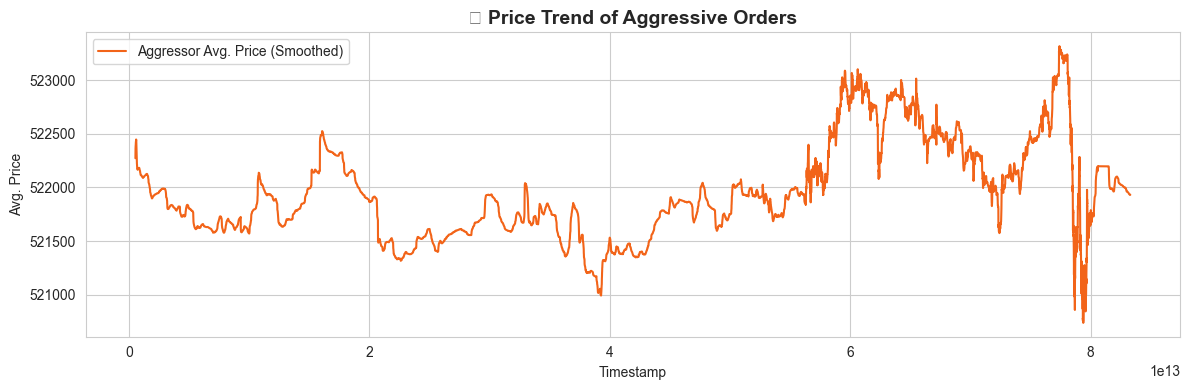

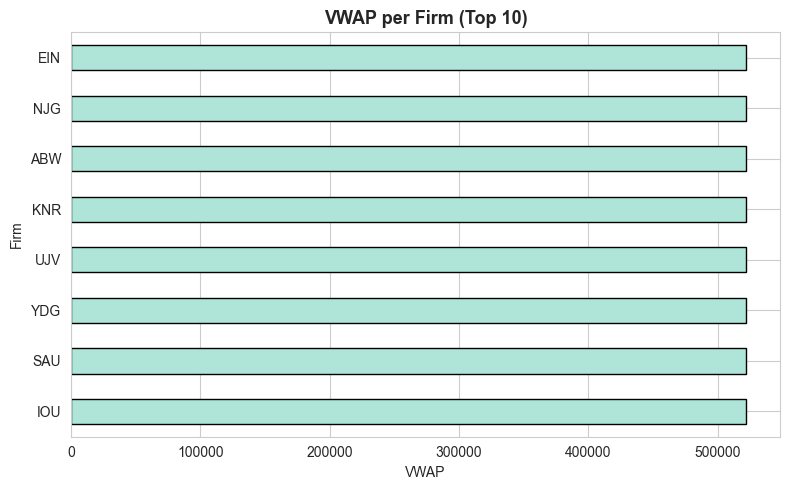

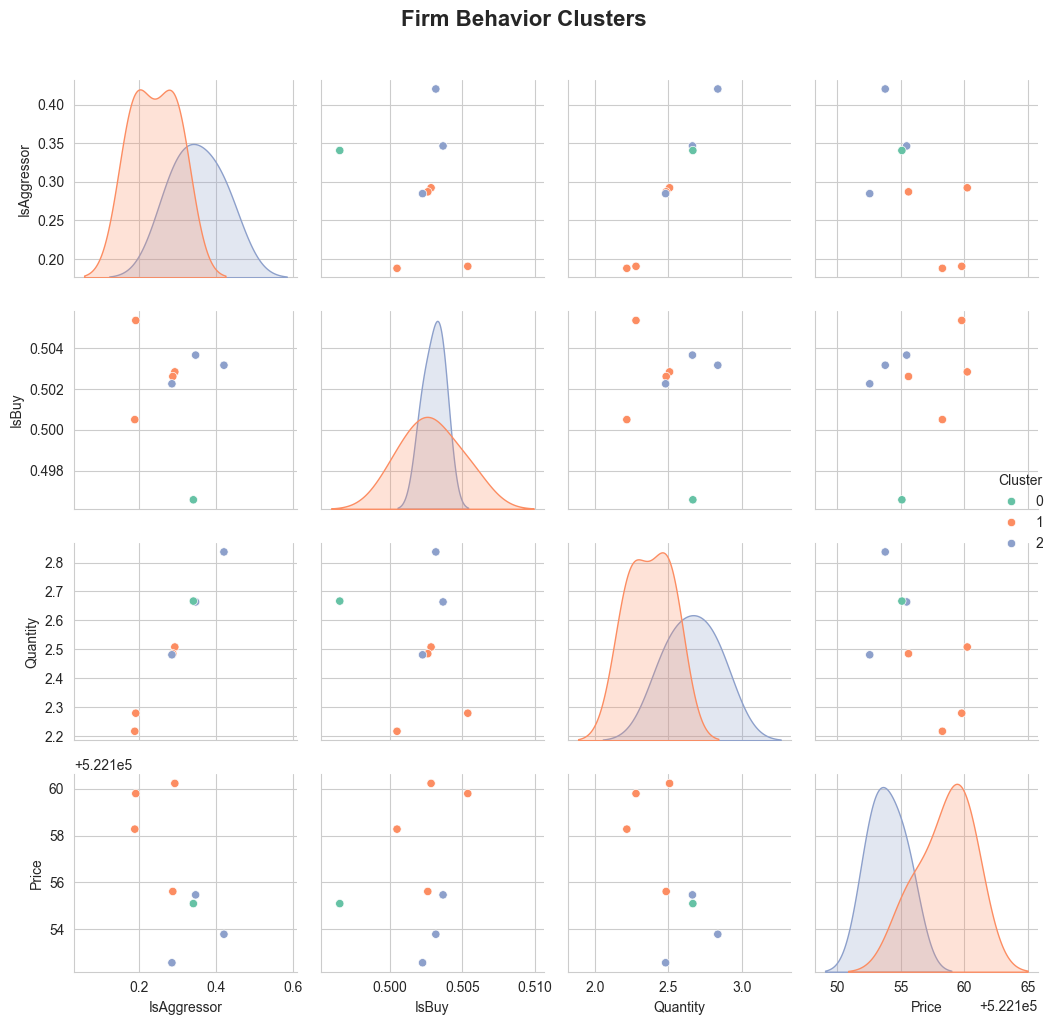

In [79]:


# Assuming 'fills_rainbow' DataFrame is already loaded in the environment

# Step 1: Create pivot table (Firm x Price)
pivot = fills_rainbow.pivot_table(
    index='Firm',
    columns='Price',
    values='Quantity',
    aggfunc='sum'
).fillna(0)

# Step 2: Select Top 10 Firms by Fill Count
top_firms = fills_rainbow['Firm'].value_counts().head(10).index
pivot_top = pivot.loc[top_firms]

# Step 3: Create Heatmap
plt.figure(figsize=(14, 6))
sns.set_style("whitegrid")
sns.heatmap(
    pivot_top,
    cmap='YlGnBu',
    linewidths=0.5,
    linecolor='lightgray',
    cbar_kws={'label': 'Total Quantity'},
    square=False
)
plt.title(" Firm vs Price Level Heatmap (Top 10 Firms)", fontsize=14, weight='bold', color='#4D4D4D')
plt.xlabel("Price", fontsize=12)
plt.ylabel("Firm", fontsize=12)
plt.xticks(rotation=45, fontsize=9)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

# Normalize by row (firm) for clearer distribution focus
pivot_normalized = pivot_top.div(pivot_top.sum(axis=1), axis=0)

plt.figure(figsize=(14, 6))
sns.heatmap(
    pivot_normalized,
    cmap='coolwarm',
    linewidths=0.4,
    linecolor='gray',
    cbar_kws={'label': 'Normalized Quantity Share'}
)
plt.title("Normalized Firm vs Price Heatmap", fontsize=14, weight='bold', color='#4D4D4D')
plt.xlabel("Price")
plt.ylabel("Firm")
plt.xticks(rotation=45, fontsize=9)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

# Timestamp conversion
fills_rainbow['Timestamp'] = pd.to_datetime(fills_rainbow['ExchangePublishTimestamp'], unit='ns')
fills_rainbow['Minute'] = fills_rainbow['Timestamp'].dt.floor('Min')


# Aggressive price trend
aggressive_only = fills_rainbow[fills_rainbow['IsAggressor'] == True]
price_series = aggressive_only.groupby('ExchangePublishTimestamp')['Price'].mean().rolling(200).mean()

plt.figure(figsize=(12, 4))
plt.plot(price_series, color="#F26419", label="Aggressor Avg. Price (Smoothed)")
plt.title("📈 Price Trend of Aggressive Orders", fontsize=14, weight='bold')
plt.xlabel("Timestamp")
plt.ylabel("Avg. Price")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# VWAP calculation
fills_rainbow['VWAP'] = fills_rainbow['Price'] * fills_rainbow['Quantity']
vwap_per_firm = fills_rainbow.groupby('Firm').apply(lambda df: df['VWAP'].sum() / df['Quantity'].sum())
vwap_per_firm = vwap_per_firm.sort_values(ascending=False).head(10)

plt.figure(figsize=(8, 5))
vwap_per_firm.plot(kind='barh', color="#AEE5D8", edgecolor='black')
plt.title("VWAP per Firm (Top 10)", fontsize=13, weight='bold')
plt.xlabel("VWAP")
plt.tight_layout()
plt.show()

# Clustering analysis
features = fills_rainbow.groupby('Firm')[['IsAggressor', 'IsBuy', 'Quantity', 'Price']].mean()
features_scaled = StandardScaler().fit_transform(features)

kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(features_scaled)

features['Cluster'] = labels

# Visualize clusters using pairplot
sns.pairplot(features.reset_index(), hue='Cluster', palette='Set2')
plt.suptitle("Firm Behavior Clusters", fontsize=16, weight='bold', y=1.02)
plt.tight_layout()
plt.show()
